### Edge flow denoising


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sclibrary import SCPlot, dataset_loader

sc, coordinates = dataset_loader.load_paper_data()

# create a plot
scplot = SCPlot(sc, coordinates)

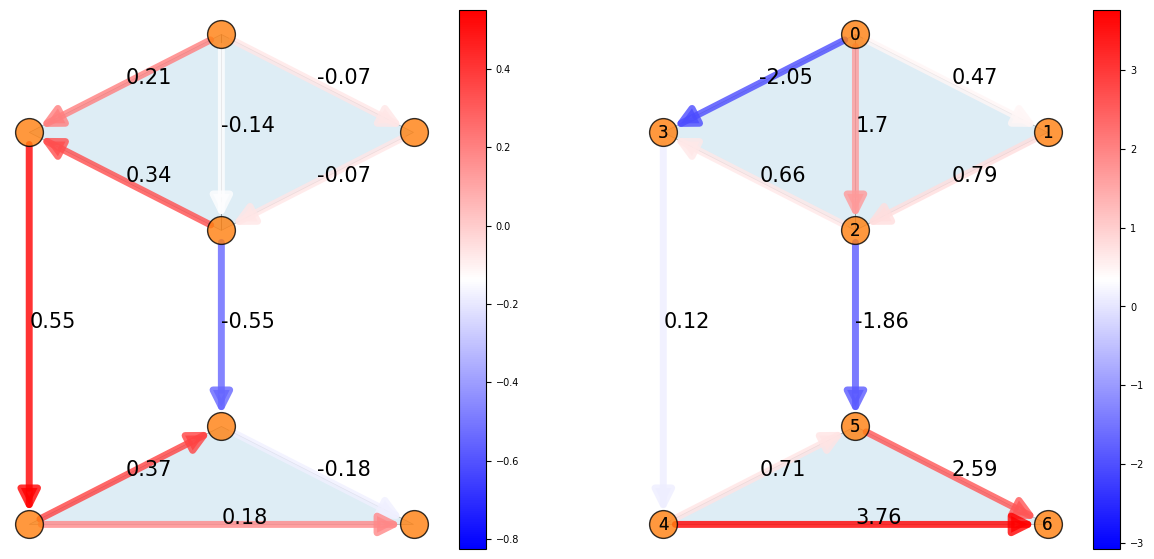

In [17]:
f0 = np.array([
    -0.0689,
    -0.1378,
    0.2067,
    -0.0689,
    0.3445,
    -0.5512,
    0.5512,
    0.3675,
    0.1837,
    -0.1837
])


f = np.array([
    0.4688,
    1.6961,
    -2.0522,
    0.7933,
    0.6633,
    -1.8589,
    0.1176,
    0.7101,
    3.7621,
    2.5857
])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=np.round(f0, 2), ax=ax1)
scplot.draw_network(edge_flow=np.round(f, 2) , ax=ax2)

mu: 0.01, error: 5.479191539690547
mu: 0.05, error: 4.855162337733226
mu: 0.1, error: 4.263315784235484
mu: 0.25, error: 3.1494643914408025
mu: 0.5, error: 2.216255011763776
mu: 1, error: 1.4046125137410006
mu: 2.5, error: 0.6770858566332978
mu: 5, error: 0.3669886600120815
mu: 10, error: 0.19583438479210225
mu: 25, error: 0.09245610304002778
mu: 50, error: 0.06360391405855051
mu: 100, error: 0.05381491060683157


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


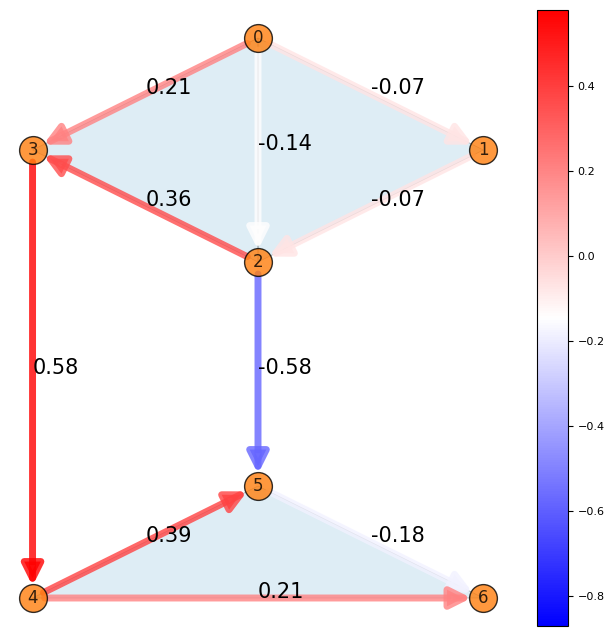

In [18]:
from sclibrary.filters import EdgeFlowDenoising

mu_values = [1e-2, 5e-2, 1e-1, 2.5e-1, 5e-1, 1, 2.5, 5, 10, 25, 50, 100]

# denoising with lowe pass filter
efd = EdgeFlowDenoising(simplicial_complex=sc)
efd.denoise(f=f, f_true=f0, p_choice="L1", mu_vals=mu_values)

f_est_L1 = efd.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est_L1, 2))

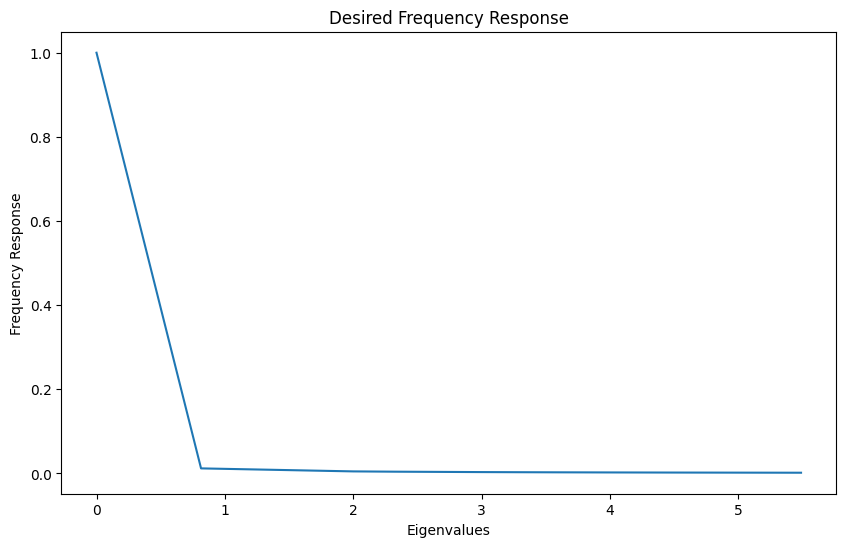

In [19]:
efd.plot_desired_frequency_response(p_choice="L1")